In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set()

In [4]:
page = requests.get('https://myillini.illinois.edu/Programs')
soup = BeautifulSoup(page.content, 'html.parser')
majors = soup.find('div', class_='columns-2').find_all('p')

In [5]:
baseUrl = 'https://myillini.illinois.edu/Programs/MajorDetail/'
baseSampleJob = 'https://myillini.illinois.edu/Programs/ProgramSurveyEmployers/'
baseSampleGradSchool = 'https://myillini.illinois.edu/Programs/ProgramSurveyGradSchools/'

urls = []
for major in majors:
    urls.append(list(major.children)[1]['href'].split('/')[3])

In [6]:
# print(urls)

In [7]:
# Do not arbitrarily change the order of this.
fieldsKey = [
    'Major Name',
    'Major Description',
    'College',
    'Related Majors',
    'Career Options',
    'Avg Starting Salary',
    'Sample Employer Destinations',
    'Sample Grad School Destinations',
    'Employed After Grad',
    'Attending Grad School',
    'Years To Degree',
    '4 Yr Grad Rate',
    'International Tuition',
    'Non-Resident Tuition',
    'Illinois Tuition',
    'Fees',
    'Expenses'
]

In [8]:
fieldsKey[0]

'Major Name'

In [9]:
info = pd.DataFrame(columns=fieldsKey)
# info = info.append({'Major Name': 'AA'}, ignore_index=True)
info[:]

,Major Name,Major Description,College,Related Majors,Career Options,Avg Starting Salary,Sample Employer Destinations,Sample Grad School Destinations,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition,Fees,Expenses


In [10]:
for majorCode in urls:
    try:
        url = baseUrl + majorCode
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        data = {}
        print(soup.find('div', class_='programItem').find('h1').get_text())

        data[fieldsKey[0]] = soup.find('div', class_='programItem').find('h1').get_text()
        data[fieldsKey[1]] = soup.find('div', class_='programDescription').find('p').get_text()
        data[fieldsKey[2]] = soup.find('div', class_='programUrls').find('a').get_text()
        data[fieldsKey[3]] = [x.find('div').find('a').get_text() for x in list(soup.find('div', class_="relatedMajors").find_all('div', class_='data-parent major-holder'))]

        money = soup.find_all('ul', class_="list-group list-group-flush tuition-list mb-4")
        data[fieldsKey[12]] = soup.find('ul', class_="list-group list-group-flush tuition-list").find('li').find_all('span')[1].get_text()
        data[fieldsKey[13]] = money[1].find('li').find_all('span')[1].get_text()
        data[fieldsKey[14]] = money[0].find('li').find_all('span')[1].get_text()
        data[fieldsKey[15]] = money[1].find_all('li')[1].find_all('span')[1].get_text()
        data[fieldsKey[16]] = money[1].find_all('li')[2].find_all('span')[1].get_text()

        numbers = soup.find_all('span', class_="number")
        data[fieldsKey[8]] = numbers[1].get_text()
        data[fieldsKey[9]] = numbers[2].get_text()
        if len(numbers) == 8:
            data[fieldsKey[5]] = numbers[3].get_text() 
            data[fieldsKey[10]] = numbers[4].get_text() 
            data[fieldsKey[11]] = numbers[6].get_text()
        elif len(numbers) == 9:
            data[fieldsKey[5]] = numbers[4].get_text() 
            data[fieldsKey[10]] = numbers[5].get_text() 
            data[fieldsKey[11]] = numbers[7].get_text()
        elif len(numbers) == 6:
            data[fieldsKey[5]] = numbers[3].get_text() 
            data[fieldsKey[10]] = numbers[4].get_text() 
            data[fieldsKey[11]] = numbers[7].get_text()
        elif len(numbers) == 4:
            data[fieldsKey[5]] = NaN
            data[fieldsKey[10]] = numbers[0].get_text() 
            data[fieldsKey[11]] = numbers[2].get_text()

        sampleJobs = baseSampleJob + majorCode
        sampleGradSchool = baseSampleGradSchool + majorCode
        res2 = requests.get(sampleJobs)
        res3 = requests.get(sampleGradSchool)
        soup2 = BeautifulSoup(res2.content, 'html.parser')
        soup3 = BeautifulSoup(res3.content, 'html.parser')
        all2 = soup2.find_all('li')
        all3 = soup3.find_all('li')
        data[fieldsKey[6]] = [x.get_text() for x in all2]
        data[fieldsKey[7]] = [x.get_text() for x in all3]
        
        data[fieldsKey[4]] = [x.get_text() for x in list(soup.find('div', class_="programCareerExamples").find_all('li'))]
    except:
        print('Error!')
    finally:
        info = info.append(data, ignore_index=True)

Accountancy
ACES Undeclared
Error!
Acting
Actuarial Science
Advertising
Aerospace Engineering
African American Studies
Agri-Accounting
Agribusiness, Markets & Management
Agricultural and Biological Engineering
Ag & Bio Engineering
Agricultural and Consumer Economics
Agricultural Communications - Advertising
Agricultural Communications - Journalism
Agricultural Education
Agricultural Leadership, Education, and Communications
Error!
Animal Sciences
Anthropology
Architectural Studies
Art and Art History 
Art Education (K-12)
Arts and Entertainment Technology 
Error!
Asian American Studies
Astronomy
Atmospheric Sciences
Biochemistry
Bioengineering
Biology
Error!
Brain and Cognitive Science
Error!
Chemical Engineering
Chemistry
Civil Engineering
Classics
Error!
Communication
Community Health
Comparative and World Literature
Computer Engineering
Computer Science
Computer Science and Advertising
Error!
Computer Science and Animal Sciences
Error!
Computer Science and Anthropology
Error!
Comput

In [11]:
# For the companies that hire the most, draw a pie chart to show comparatively how much they employ from each college (eg - Engineering).
# Given any unseen major, use the text to rank the level of match to majors in my dataset, then use regression to predict average salary and chance of employment.

# Use webscraping of other articles and print charts showing which majors are growing the fastest in job growth and salary growth.
# Draw graphs of majors by salary range and graphs of employers by the majors they hire for. (graphs similar to dagre)

In [12]:
info = info.dropna()

In [13]:
info

,Major Name,Major Description,College,Related Majors,Career Options,Avg Starting Salary,Sample Employer Destinations,Sample Grad School Destinations,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition,Fees,Expenses
0,Accountancy,"Accountancy is about the recording, analysis, ...",Gies College of Business,"[Agri-Accounting - ACES, Finance - BUS, Financ...","[Corporate accounting, Forensic consulting, Go...","$62,142","[Abbott, Abbott Laboratories, Abercrombie & Fi...","[Arizona State University, Belmont University,...",40%,57%,3.7,83%,"$37,876","$34,798","$17,348","$4,475","$16,292"
2,Acting,This program is a concentration within Theatre...,College of Fine & Applied Arts,"[Dance (BFA) - FAA, Music Open Studies - FAA, ...","[Film, Musical theatre, Teaching, Television, ...","$50,503","[American Conservatory Theater, Arkansas Shake...","[Amara Yoga & Arts, National Louis University,...",56%,31%,4.0,60%,"$32,198","$31,308","$13,858","$4,475","$16,292"
3,Actuarial Science,Actuarial Science is a field that combines oth...,College of Liberal Arts & Sciences,"[Economics - LAS, Finance - BUS, Mathematics -...","[Actuarial science, Data analysis, Quantitativ...","$61,563","[Aetna, AIG, Allianz, Allstate Insurance Compa...","[Carnegie Mellon University, Columbia Universi...",69%,16%,3.8,85%,"$32,094","$29,704","$12,254","$4,475","$16,292"
4,Advertising,"Draw upon insights from psychology, sociology,...",College of Media,"[Communication - LAS, Graphic Design - FAA, Jo...","[Advertising, Communications, Copywriting, Fun...","$43,041","[360i, 3Q Digital, 4C Insights, 55places.com, ...","[Chicago Portfolio School, Columbia College Ch...",84%,5%,3.8,80%,"$31,374","$30,484","$13,034","$4,475","$16,292"
5,Aerospace Engineering,"Aerospace Engineering focuses on the research,...",Grainger College of Engineering,"[Electrical Engineering - ENG, Engineering Mec...","[Aerospace, Automotive work, Defense, Engines,...","$65,361","[Accenture, American Airlines, Arabella Adviso...","[Birkbeck, University of London, California In...",62%,26%,4.1,66%,"$40,146","$34,798","$17,348","$4,475","$16,292"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Supply Chain Management,Supply Chain Management is one of the most imp...,Gies College of Business,"[Farm Management - ACES, Information Systems -...","[Consulting, Logistics, Management, Procuremen...","$63,420","[3M, Abbott, Abbott Laboratories, AbbVie, Aber...","[Columbia University, University of Illinois a...",95%,4%,3.7,83%,"$37,876","$34,798","$17,348","$4,475","$16,292"
160,Systems Engineering and Design,This major provides a solid foundation in math...,Grainger College of Engineering,"[Engineering Mechanics - ENG, Materials Scienc...","[Administration, Automotive, control systems, ...","$65,116","[1872 Consulting, AbbVie, Accenture, AIG, Bear...","[Stanford University, University of Illinois a...",80%,10%,4.4,66%,"$40,146","$34,798","$17,348","$4,475","$16,292"
165,Technical Systems Management,This major applies both engineering principles...,"College of Agricultural, Consumer & Environmen...",[Agricultural and Biological Engineering - ENG...,"[Management, Marketing, Operations, Maintenanc...","$54,600","[A & H Plumbing, Accenture, AHW, Amazon, Amere...","[DePaul University, Harold Washington College,...",79%,7%,4.1,74%,"$33,180","$32,290","$14,840","$4,475","$16,292"
166,Theatre Studies,Theatre Studies is a concentration within Thea...,College of Fine & Applied Arts,"[Acting - FAA, Creative Writing - LAS, Media a...","[Arts administration, Casting, Directing, Perf...","$50,503","[American Conservatory Theater, Arkansas Shake...","[Amara Yoga & Arts, National Louis University,...",56%,31%,4.0,60%,"$32,198","$31,308","$13,858","$4,475","$16,292"


In [31]:
contCols = [fieldsKey[5], fieldsKey[8], fieldsKey[9], fieldsKey[10], fieldsKey[11], fieldsKey[12], fieldsKey[13], fieldsKey[14]]
contData = pd.DataFrame(columns=contCols)

In [32]:
contData[fieldsKey[5]] = info[fieldsKey[5]]
contData[fieldsKey[8]] = info[fieldsKey[8]]
contData[fieldsKey[9]] = info[fieldsKey[9]]
contData[fieldsKey[10]] = info[fieldsKey[10]]
contData[fieldsKey[11]] = info[fieldsKey[11]]
contData[fieldsKey[12]] = info[fieldsKey[12]]
contData[fieldsKey[13]] = info[fieldsKey[13]]
contData[fieldsKey[14]] = info[fieldsKey[14]]

In [33]:
contData

,Avg Starting Salary,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition
0,"$62,142",40%,57%,3.7,83%,"$37,876","$34,798","$17,348"
2,"$50,503",56%,31%,4.0,60%,"$32,198","$31,308","$13,858"
3,"$61,563",69%,16%,3.8,85%,"$32,094","$29,704","$12,254"
4,"$43,041",84%,5%,3.8,80%,"$31,374","$30,484","$13,034"
5,"$65,361",62%,26%,4.1,66%,"$40,146","$34,798","$17,348"
...,...,...,...,...,...,...,...,...
158,"$63,420",95%,4%,3.7,83%,"$37,876","$34,798","$17,348"
160,"$65,116",80%,10%,4.4,66%,"$40,146","$34,798","$17,348"
165,"$54,600",79%,7%,4.1,74%,"$33,180","$32,290","$14,840"
166,"$50,503",56%,31%,4.0,60%,"$32,198","$31,308","$13,858"


In [34]:
contData[fieldsKey[8]] = [int(str(x)[:-1]) for x in contData[fieldsKey[8]]]
contData[fieldsKey[9]] = [int(str(x)[:-1]) for x in contData[fieldsKey[9]]]
contData[fieldsKey[11]] = [int(str(x)[:-1]) for x in contData[fieldsKey[11]]]

In [35]:
contData[fieldsKey[5]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[5]]]
contData[fieldsKey[12]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[12]]]
contData[fieldsKey[13]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[13]]]
contData[fieldsKey[14]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[14]]]

In [36]:
contData[fieldsKey[10]] = [float(x) for x in contData[fieldsKey[10]]]

In [37]:
contData

,Avg Starting Salary,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition
0,62142,40,57,3.7,83,37876,34798,17348
2,50503,56,31,4.0,60,32198,31308,13858
3,61563,69,16,3.8,85,32094,29704,12254
4,43041,84,5,3.8,80,31374,30484,13034
5,65361,62,26,4.1,66,40146,34798,17348
...,...,...,...,...,...,...,...,...
158,63420,95,4,3.7,83,37876,34798,17348
160,65116,80,10,4.4,66,40146,34798,17348
165,54600,79,7,4.1,74,33180,32290,14840
166,50503,56,31,4.0,60,32198,31308,13858


In [76]:
corr = contData.corr()

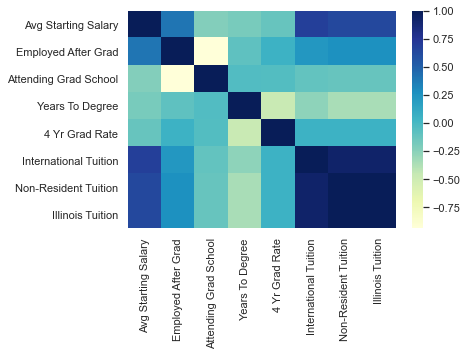

In [79]:
ax = sns.heatmap(corr, cmap="YlGnBu")

In [39]:
contData['Major Name'] = info['Major Name']
contData['College'] = info['College']
data = contData

In [41]:
Art = data[data['College'] == 'College of Fine & Applied Arts']
Eng = data[data['College'] == 'Grainger College of Engineering']
Bus = data[data['College'] == 'Gies College of Business']
Las = data[data['College'] == 'College of Liberal Arts & Sciences']
Media = data[data['College'] == 'College of Media']

Text(0, 0.5, 'Frequency')

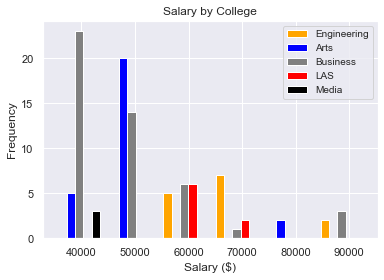

In [56]:
var = fieldsKey[5]
x_multi = [
    Eng[var],
    Art[var],
    Las[var],
    Bus[var],
    Media[var]
    ]
    
n_bins = 6

colors = ['orange', 'blue', 'grey', 'red', 'black']
labels = ['Engineering','Arts','Business', 'LAS', 'Media']

plt.hist(x_multi, n_bins, histtype='bar',color=colors,label= labels)

plt.legend(prop={'size': 10})
plt.title('Salary by College')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

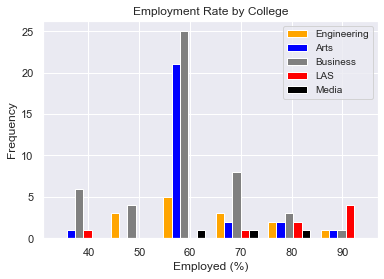

In [55]:
var = fieldsKey[8]
x_multi = [
    Eng[var],
    Art[var],
    Las[var],
    Bus[var],
    Media[var]
    ]

n_bins = 6

colors = ['orange', 'blue', 'grey', 'red', 'black']
labels = ['Engineering','Arts','Business', 'LAS', 'Media']

plt.hist(x_multi, n_bins, histtype='bar',color=colors,label= labels)

plt.legend(prop={'size': 10})
plt.title('Employment Rate by College')
plt.xlabel('Employed (%)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

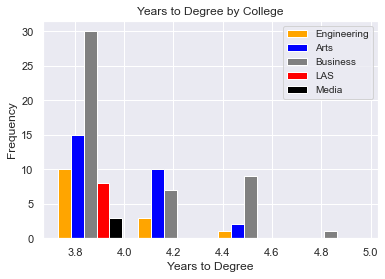

In [61]:
var = fieldsKey[10]
x_multi = [
    Eng[var],
    Art[var],
    Las[var],
    Bus[var],
    Media[var]
    ]

n_bins = 4

colors = ['orange', 'blue', 'grey', 'red', 'black']
labels = ['Engineering','Arts','Business', 'LAS', 'Media']

plt.hist(x_multi, n_bins, histtype='bar',color=colors,label= labels)

plt.legend(prop={'size': 10})
plt.title('Years to Degree by College')
plt.xlabel('Years to Degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

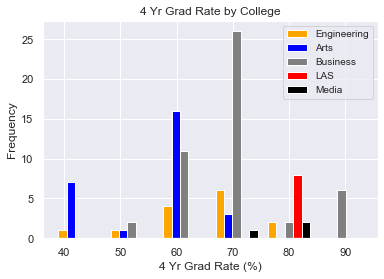

In [60]:
var = fieldsKey[11]
x_multi = [
    Eng[var],
    Art[var],
    Las[var],
    Bus[var],
    Media[var]
    ]

n_bins = 6

colors = ['orange', 'blue', 'grey', 'red', 'black']
labels = ['Engineering','Arts','Business', 'LAS', 'Media']

plt.hist(x_multi, n_bins, histtype='bar',color=colors,label= labels)

plt.legend(prop={'size': 10})
plt.title('4 Yr Grad Rate by College')
plt.xlabel('4 Yr Grad Rate (%)')
plt.ylabel('Frequency')

In [ ]:
gradSchools = {}
if x in gradSchools:
    gradSchools[x]: gradSchools[x] + 1
else:
    gradSchools[x]: 1

In [63]:
data[fieldsKey[6]] = info[fieldsKey[6]]
data[fieldsKey[7]] = info[fieldsKey[7]]

In [79]:
allEmployers = data[fieldsKey[6]]

In [108]:
# employers = {}
# for y in data[fieldsKey[6]]:
#     for z in y:
#         x = str(z)
#         if x in employers:
#             employers[x] = employers[x] + 1
#         else:
#             employers[x] = 1

In [122]:
# employers = {}
# i = 0
# for i in range(len(data[fieldsKey[6]])):
#     y = data[fieldsKey[6]][i]
#     for z in y:
#         x = str(z)
#         if x in employers:
#             employers[x] = {
#                 'Count': employers[x]['Count'] + 1,
#                 fieldsKey[0]: employers[x][fieldsKey[0]].append(info[fieldsKey[0]][i]),
#                 fieldsKey[2]: employers[x][fieldsKey[2]].append(info[fieldsKey[2]][i]),
#                 fieldsKey[4]: employers[x][fieldsKey[4]].append(info[fieldsKey[4]][i]),
#                 fieldsKey[8]: employers[x][fieldsKey[8]].append(data[fieldsKey[8]][i]),
#                 fieldsKey[9]: employers[x][fieldsKey[9]].append(data[fieldsKey[9]][i]),
#                 fieldsKey[11]: employers[x][fieldsKey[11]].append(data[fieldsKey[11]][i]),
#                 fieldsKey[10]: employers[x][fieldsKey[10]].append(data[fieldsKey[10]][i]),
#             }
#         else:
#             employers[x] = {
#                 'Count': 1,            
#                 fieldsKey[0]: [info[fieldsKey[0]][i]],
#                 fieldsKey[2]: [info[fieldsKey[2]][i]],
#                 fieldsKey[4]: [info[fieldsKey[4]][i]],
#                 fieldsKey[8]: [data[fieldsKey[8]][i]],
#                 fieldsKey[9]: [data[fieldsKey[9]][i]],
#                 fieldsKey[10]: [data[fieldsKey[10]][i]],
#                 fieldsKey[11]: [data[fieldsKey[11]][i]],
#             }
#     i += 1

KeyError: 1

In [153]:
employers = {}
i = 0
for i in range(10):
    try:
        y = data[fieldsKey[6]][i]
    except:
        continue
    for z in y:
        x = str(z)
        if x in employers:
            employers[x] = {
                'Count': employers[x]['Count'] + 1,
                # fieldsKey[0]: employers[x][fieldsKey[0]].append(info[fieldsKey[0]][i]),
                # fieldsKey[2]: employers[x][fieldsKey[2]].append(info[fieldsKey[2]][i]),
                # fieldsKey[4]: employers[x][fieldsKey[4]].append(info[fieldsKey[4]][i]),
                # fieldsKey[8]: employers[x][fieldsKey[8]].append(data[fieldsKey[8]][i]),
                # fieldsKey[9]: employers[x][fieldsKey[9]].append(data[fieldsKey[9]][i]),
                # fieldsKey[11]: employers[x][fieldsKey[11]].append(data[fieldsKey[11]][i]),
                # fieldsKey[10]: employers[x][fieldsKey[10]].append(data[fieldsKey[10]][i])
            }
        else:
            employers[x] = {
                'Count': 1,            
                # fieldsKey[0]: [info[fieldsKey[0]][i]],
                # fieldsKey[2]: [info[fieldsKey[2]][i]],
                # fieldsKey[4]: [info[fieldsKey[4]][i]],
                # fieldsKey[8]: [data[fieldsKey[8]][i]],
                # fieldsKey[9]: [data[fieldsKey[9]][i]],
                # fieldsKey[10]: [data[fieldsKey[10]][i]],
                # fieldsKey[11]: [data[fieldsKey[11]][i]]
            }
    i += 1

In [154]:
y = data.loc[24, [fieldsKey[6]]]
print(type([y]))

<class 'list'>


In [158]:
employers['Deloitte']

{'Count': 4}

In [85]:
employerLists[5]

['Great Oaks Legacy Charter School',
 'Manchester University',
 'Obama Foundation',
 'Strategy Lending Services',
 'Teach for America',
 'University of Illinois at Urbana-Champaign, Technology Services']

In [160]:
[k for k,v in employers.items() if float(v) >= 10]

TypeError: float() argument must be a string or a number, not 'dict'

In [114]:
a = ['Ji']

In [147]:
a.append('K')
print(type(a))

<class 'list'>
